# Requirements

In [2]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# Add as many imports as you need.
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# Laboratory Exercise - Run Mode (8 points)

## Introduction
Mammography is the most effective method for breast cancer screening available today. However, the low positive predictive value of breast biopsy resulting from mammogram interpretation leads to approximately 70% unnecessary biopsies with benign outcomes. To reduce the high number of unnecessary breast biopsies, several computer-aided diagnosis (CAD) systems have been proposed in the last years.These system help physicians in their decision to perform a breast biopsy on a suspicious lesion seen in a mammogram or to perform a short term follow-up examination instead. This data set can be used to predict the severity (benign or malignant) of a mammographic mass lesion from BI-RADS attributes and the patient's age. It contains a BI-RADS assessment, the patient's age and three BI-RADS attributes together with the ground truth (the severity field) for 516 benign and 445 malignant masses that have been identified on full field digital mammograms collected at the Institute of Radiology of the University Erlangen-Nuremberg between 2003 and 2006. Each instance has an associated BI-RADS assessment ranging from 1 (definitely benign) to 5 (highly suggestive of malignancy) assigned in a double-review process by physicians. Assuming that all cases with BI-RADS assessments greater or equal a given value (varying from 1 to 5), are malignant and the other cases benign, sensitivities and associated specificities can be calculated. These can be an indication of how well a CAD system performs compared to the radiologists. For more details visit https://archive.ics.uci.edu/dataset/161/mammographic+mass.

## The Mammographic Mass Dataset

## Downloading the Mammographic Mass Dataset

In [8]:
#!gdown 1CyiAL5d2jJHvpzt3XaY3dTto9c2d_h5R # Download the dataset.

## Exploring the Mammographic Mass Dataset
The Mammographic Mass dataset contains six attributes, among which there is a target attribute and a non-predictive attribute. 
The target attribute, denoted as 'Severity', is binomial, distinguishing between benign (0) and malignant (1) cases.
The non-predictive attribute, 'BI-RADS assessment', is an ordinal scale ranging from 1 to 5. The remaining four attributes are predictive, including 'Age', represented in years as an integer, 
'Shape' categorizing mass shape as round (1), oval (2), lobular (3), or irregular (4). 'Margin' classifies mass margins into circumscribed (1), microlobulated (2), obscured (3), ill-defined (4), or spiculated (5). 
'Density' indicates mass density as high (1), iso (2), low (3), or fat-containing (4).

In [10]:
#Load the dataset into a `pandas` data frame.
data = pd.read_csv("mammographic-mass.csv")
print(data.head())

   BI-RADS assessment   Age  Shape  Margin  Density  Severity
0                 5.0  67.0    3.0     5.0      3.0         1
1                 4.0  43.0    1.0     1.0      NaN         1
2                 5.0  58.0    4.0     5.0      3.0         1
3                 4.0  28.0    1.0     1.0      3.0         0
4                 5.0  74.0    1.0     5.0      NaN         1


In [11]:
# Write your code here. Add as many boxes as you need.
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BI-RADS assessment  959 non-null    float64
 1   Age                 956 non-null    float64
 2   Shape               930 non-null    float64
 3   Margin              913 non-null    float64
 4   Density             885 non-null    float64
 5   Severity            961 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 45.2 KB
None


In [12]:
print(data.describe())

       BI-RADS assessment         Age       Shape      Margin     Density  \
count          959.000000  956.000000  930.000000  913.000000  885.000000   
mean             4.348279   55.487448    2.721505    2.796276    2.910734   
std              1.783031   14.480131    1.242792    1.566546    0.380444   
min              0.000000   18.000000    1.000000    1.000000    1.000000   
25%              4.000000   45.000000    2.000000    1.000000    3.000000   
50%              4.000000   57.000000    3.000000    3.000000    3.000000   
75%              5.000000   66.000000    4.000000    4.000000    3.000000   
max             55.000000   96.000000    4.000000    5.000000    4.000000   

         Severity  
count  961.000000  
mean     0.463059  
std      0.498893  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000  


Drop the column `BI-RADS assessment` as it shouldn't be used for prediction.

In [14]:
# Write your code here. Add as many boxes as you need.
data = data.drop(columns=['BI-RADS assessment'])

Explore the dataset using visualizations of your choice.

In [16]:
# Write your code here. Add as many boxes as you need.
print(data.head())

    Age  Shape  Margin  Density  Severity
0  67.0    3.0     5.0      3.0         1
1  43.0    1.0     1.0      NaN         1
2  58.0    4.0     5.0      3.0         1
3  28.0    1.0     1.0      3.0         0
4  74.0    1.0     5.0      NaN         1


<Axes: >

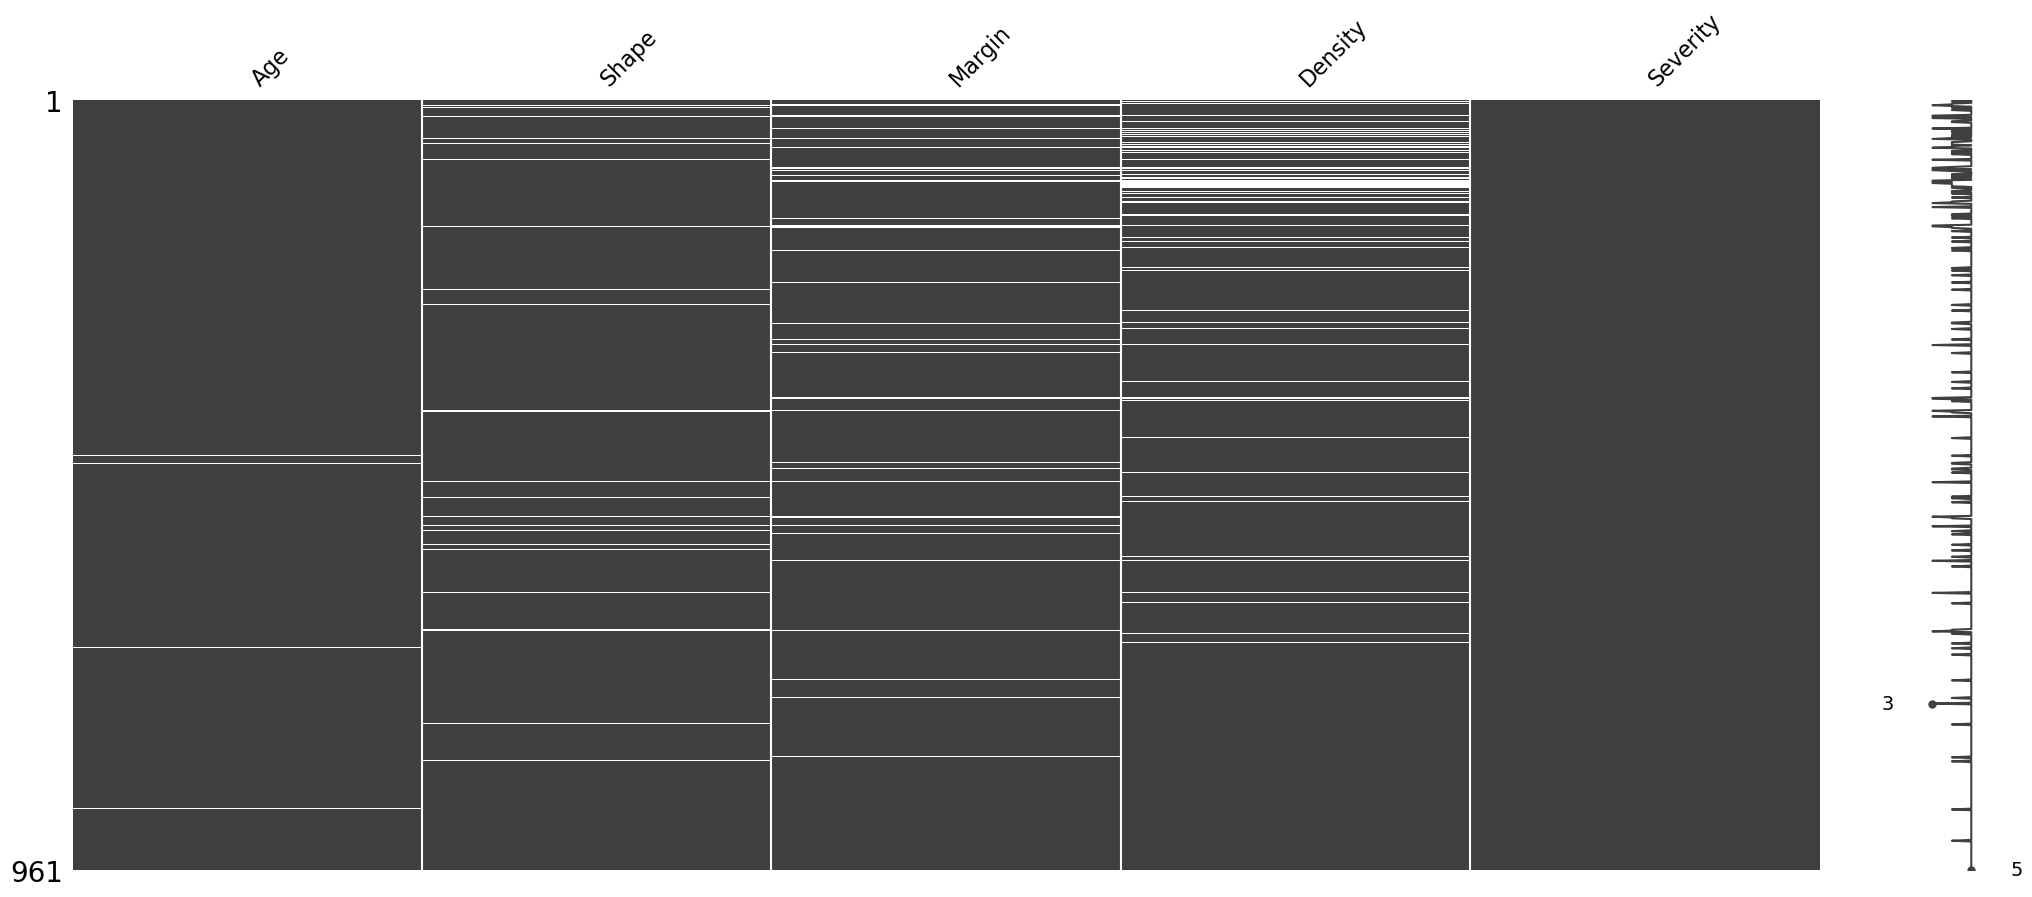

In [17]:
msno.matrix(data)

Check if the dataset is balanced.

In [19]:
# Write your code here. Add as many boxes as you need.
severity_counts = data['Severity'].value_counts()
print(severity_counts)
print(severity_counts/len(data)*100)

Severity
0    516
1    445
Name: count, dtype: int64
Severity
0    53.694069
1    46.305931
Name: count, dtype: float64


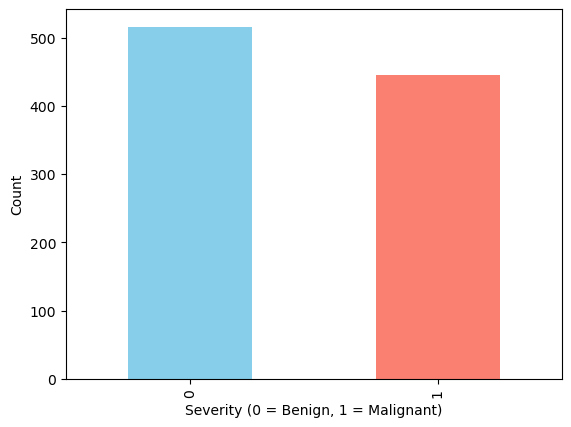

In [20]:
severity_counts.plot(kind='bar', color=['skyblue','salmon'])
plt.ylabel('Count')
plt.xlabel('Severity (0 = Benign, 1 = Malignant)')
plt.show()

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [22]:
# Write your code here. Add as many boxes as you need.
missing_values = data.isnull().sum()
missing_values_percentage = (missing_values / len(data)) *100
missing_summary = pd.DataFrame({
    'Missing Values' : missing_values,
    'Percentage Missing (%)': missing_values_percentage
})
print(missing_summary)

          Missing Values  Percentage Missing (%)
Age                    5                0.520291
Shape                 31                3.225806
Margin                48                4.994797
Density               76                7.908429
Severity               0                0.000000


## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts. To achieve this use the `missingno` library.

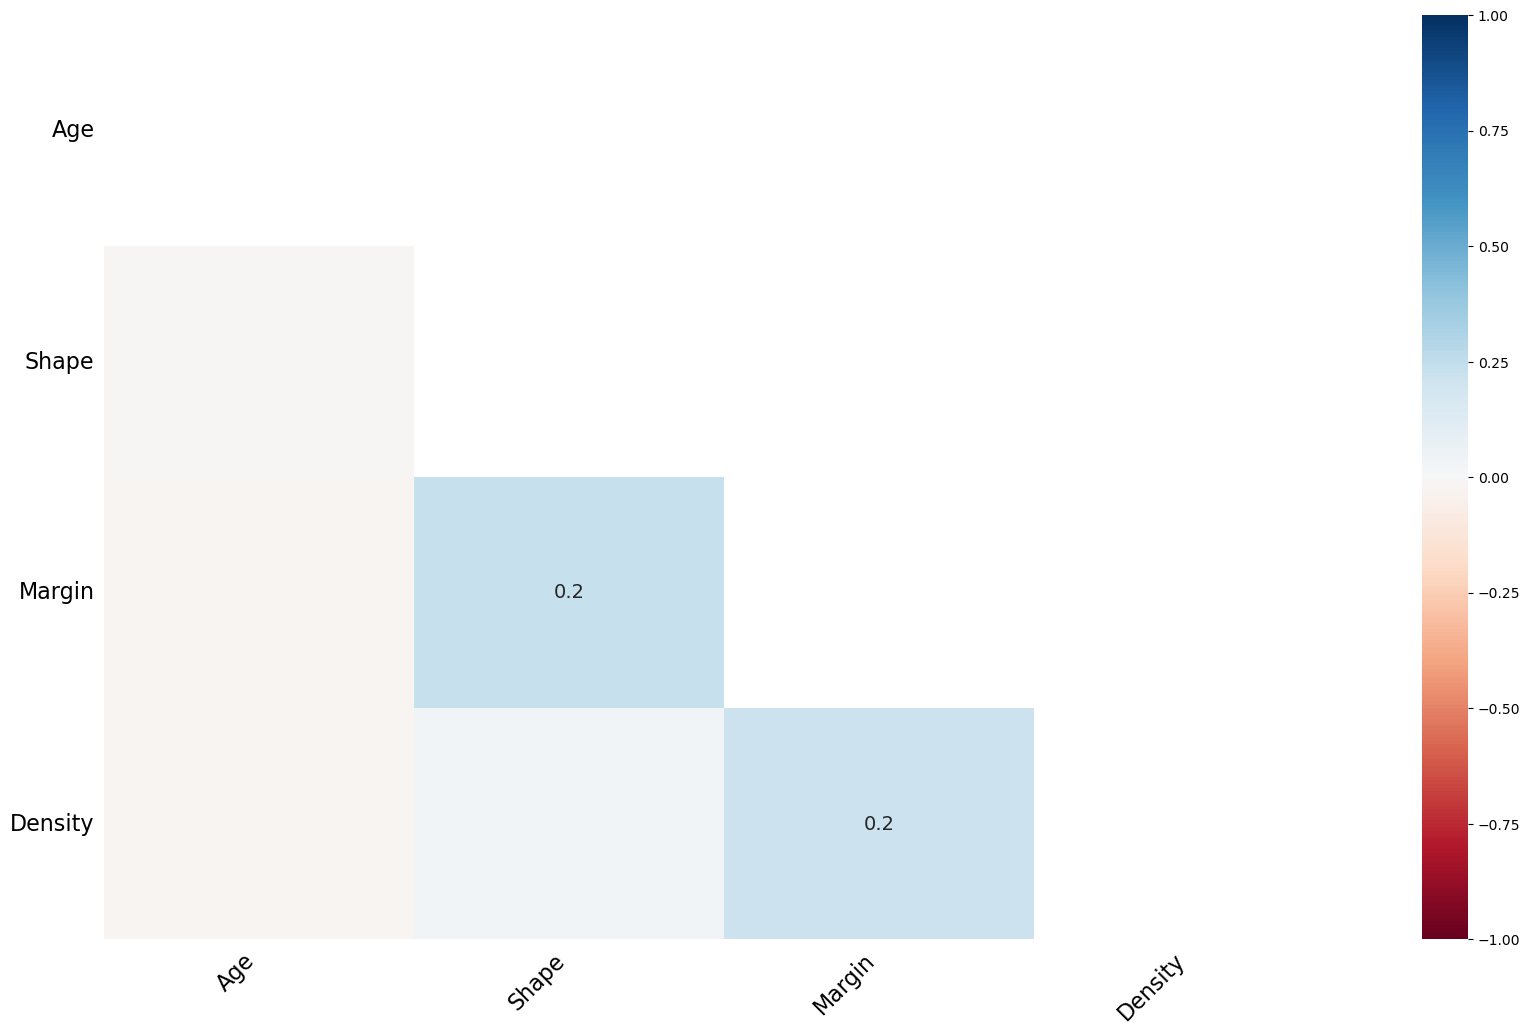

In [24]:
# Write your code here. Add as many boxes as you need.
msno.heatmap(data)
plt.show()

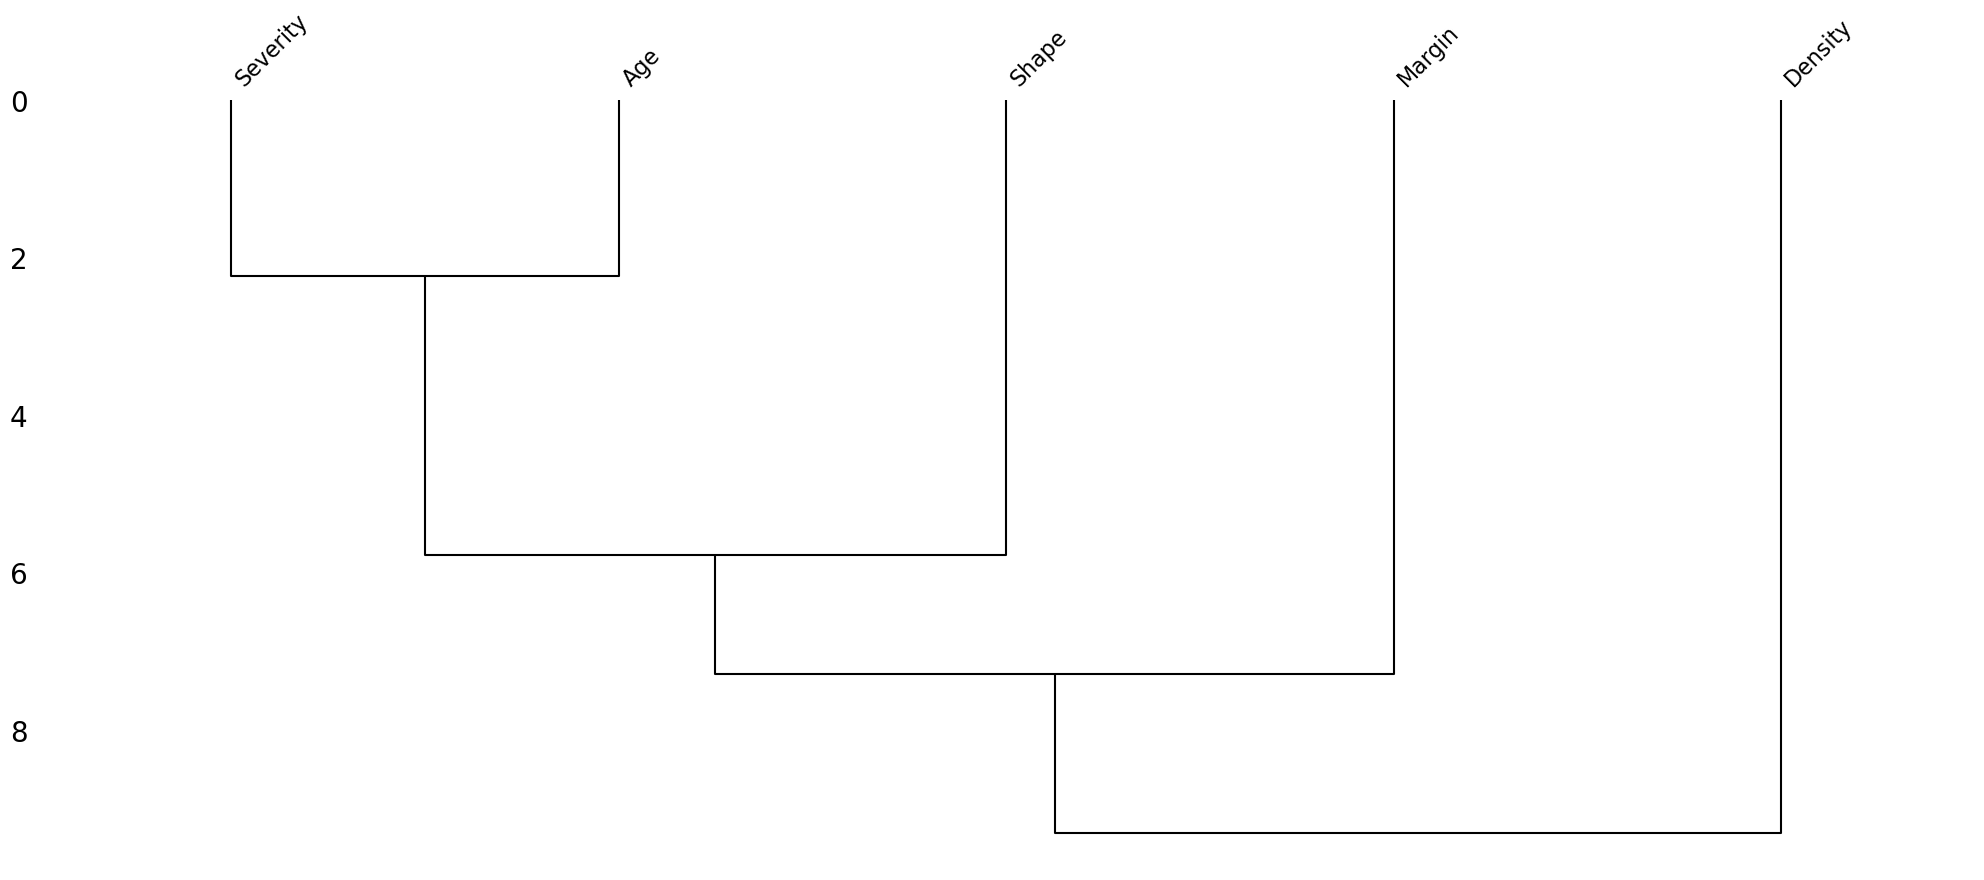

In [25]:
msno.dendrogram(data)
plt.show()

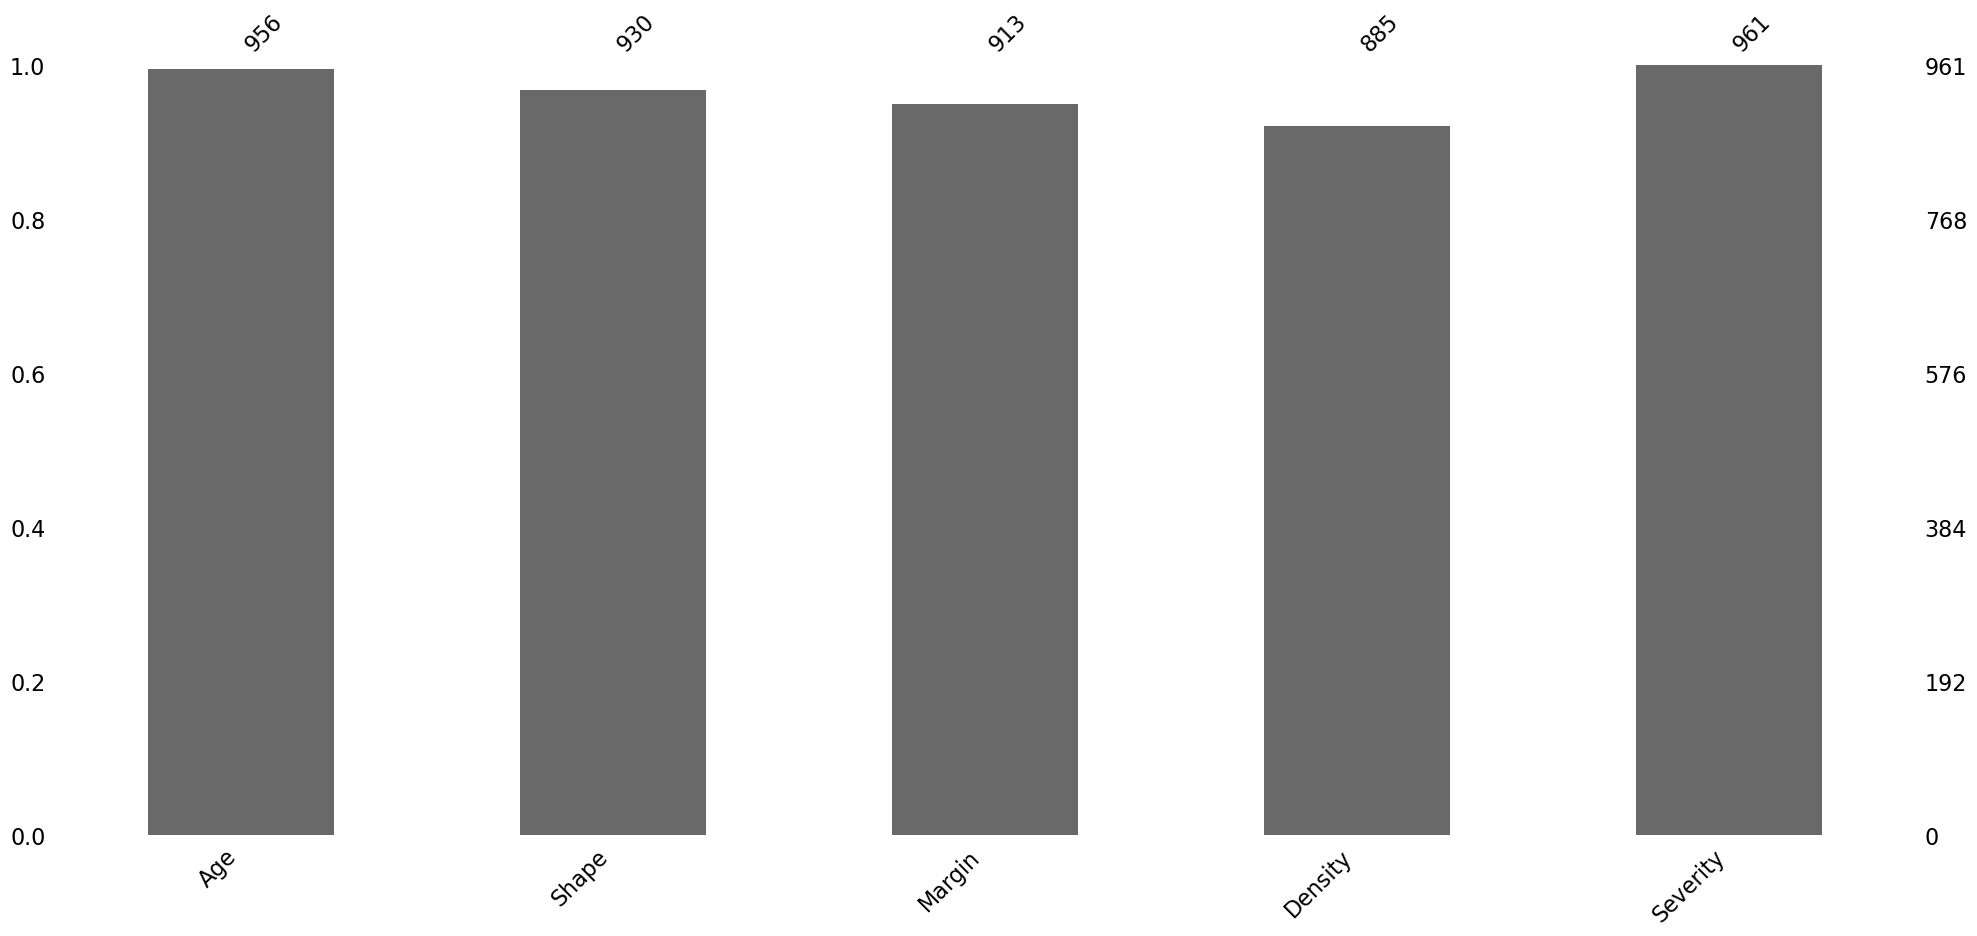

In [26]:
msno.bar(data)
plt.show()

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [28]:
# Write your code here. Add as many boxes as you need.
categorical_cols = ['Shape', 'Margin' , 'Density']
numerical_cols = ['Age']

categorical_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = categorical_imputer.fit_transform(data[categorical_cols])


numerical_imputer = SimpleImputer(strategy='mean')
data[numerical_cols] = numerical_imputer.fit_transform(data[numerical_cols])

print(data.isnull().sum())

Age         0
Shape       0
Margin      0
Density     0
Severity    0
dtype: int64


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [30]:
# Write your code here. Add as many boxes as you need.
X = data.drop('Severity', axis=1)
y = data['Severity']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

## Feature Scaling
Standardize the features using `StandardScaler`.

In [32]:
# Write your code here. Add as many boxes as you need.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Decision Tree

Create an instance of the Decision tree
 model and train it using the `fit` function.

In [35]:
# Write your code here. Add as many boxes as you need.
model = DecisionTreeClassifier()
model.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

Use the trained model to make predictions for the test set.

In [37]:
# Write your code here. Add as many boxes as you need.
y_pred_test = model.predict(X_test_scaled)

Assess the performance of the model by using different classification metrics provided by the `scikit-learn` library.

In [39]:
# Write your code here. Add as many boxes as you need.
print("Test Set Accuracy:", accuracy_score(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))

Test Set Accuracy: 0.7202072538860104
Confusion Matrix:
 [[74 26]
 [28 65]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.74      0.73       100
           1       0.71      0.70      0.71        93

    accuracy                           0.72       193
   macro avg       0.72      0.72      0.72       193
weighted avg       0.72      0.72      0.72       193



# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune three hyperparametars
using a validation set. This involves experimenting with various values for the hyperparametars and evaluating the model's performance on a validation set. Upon determining the most suitable value, evaluate the model's performance on a test set for final assessment.

## Dataset Splitting
To achieve the required split of the dataset into three sets (train set, validation set, and test set) in a ratio of 70:10:20, you can follow these steps:

- Start by splitting the dataset into a ratio of 80:20 to create the initial train and test sets.
- Subsequently, divide the initial train set further into a ratio of 87.5:12.5 to generate the final train and validation sets.

This process can be accomplished using appropriate functions from libraries such as `scikit-learn` or manually.

In [43]:
# Write your code here. Add as many boxes as you need.
X_train_val, X_test, y_train_val, y_test= train_test_split(X,y, test_size= 0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125)

print("Train size:", len(X_train))
print("Validation size:", len(X_val))
print("Test size:", len(X_test))

Train size: 672
Validation size: 96
Test size: 193


## Fine-tuning the Hyperparameters



In [45]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 2, 4]
}

gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
gridSearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [46]:
# Write your code here. Add as many boxes as you need.
print("Best Hyperparameters:",gridSearch.best_params_)
best_model = gridSearch.best_estimator_

y_pred_val = best_model.predict(X_val)
print("Accuracy:", accuracy_score(y_val,y_pred_val))

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy: 0.7604166666666666


## Final Assessment of the Model Performance

evaluate the model's performance on a test set for final assessment.

In [48]:
# Write your code here. Add as many boxes as you need.
y_pred_final_test = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test,y_pred_final_test))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred_final_test))
print("Classification Report:\n", classification_report(y_test,y_pred_final_test))

Accuracy: 0.8290155440414507
Confusion Matrix:
 [[79 18]
 [15 81]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.83        97
           1       0.82      0.84      0.83        96

    accuracy                           0.83       193
   macro avg       0.83      0.83      0.83       193
weighted avg       0.83      0.83      0.83       193

